<a href="https://colab.research.google.com/github/dirga05/Pengolahan-Citra-TI2C/blob/main/Jobsheet04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

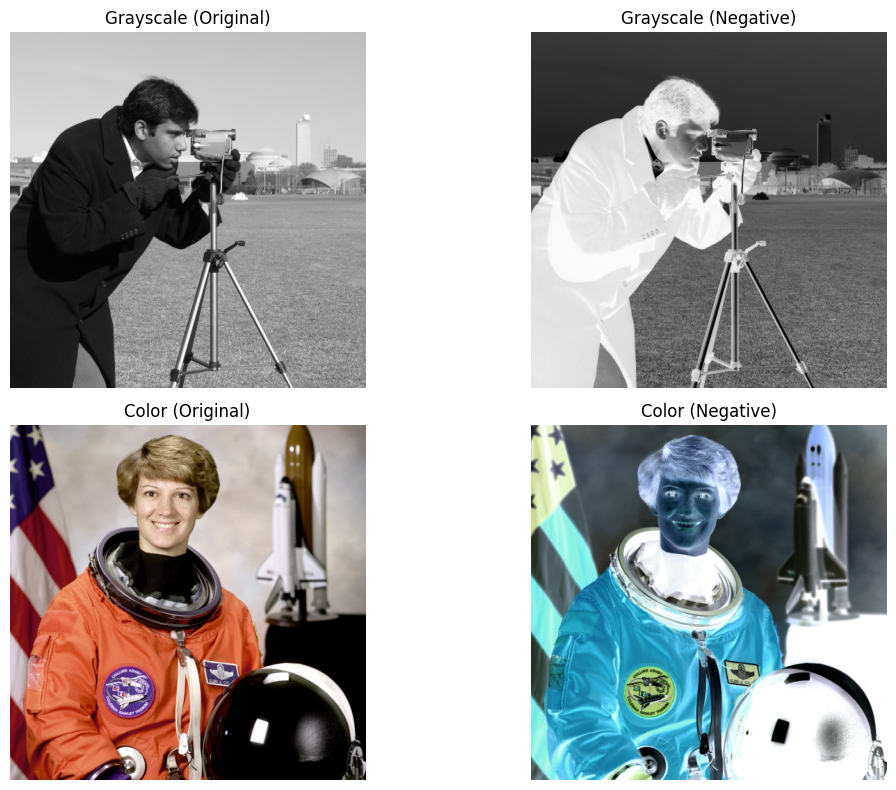

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# =======================
# 1. TRANSFORMASI NEGATIF CITRA GRAYSCALE
# =======================
image_gray_uint8 = data.camera()  # Citra grayscale (512x512, 0..255)
image_gray_float = img_as_float(image_gray_uint8)  # Konversi ke float [0..1]

negative_gray = 1.0 - image_gray_float  # Inversi intensitas: output = 1 - input

# =======================
# 2. TRANSFORMASI NEGATIF CITRA BERWARNA
# =======================
image_color_uint8 = data.astronaut()  # Citra berwarna (512x512x3, 0..255)
image_color_float = img_as_float(image_color_uint8)  # Konversi ke float [0..1]

negative_color = 1.0 - image_color_float  # Inversi intensitas tiap kanal RGB

# =======================
# 3. PLOTTING HASIL
# =======================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


# Praktikum 2

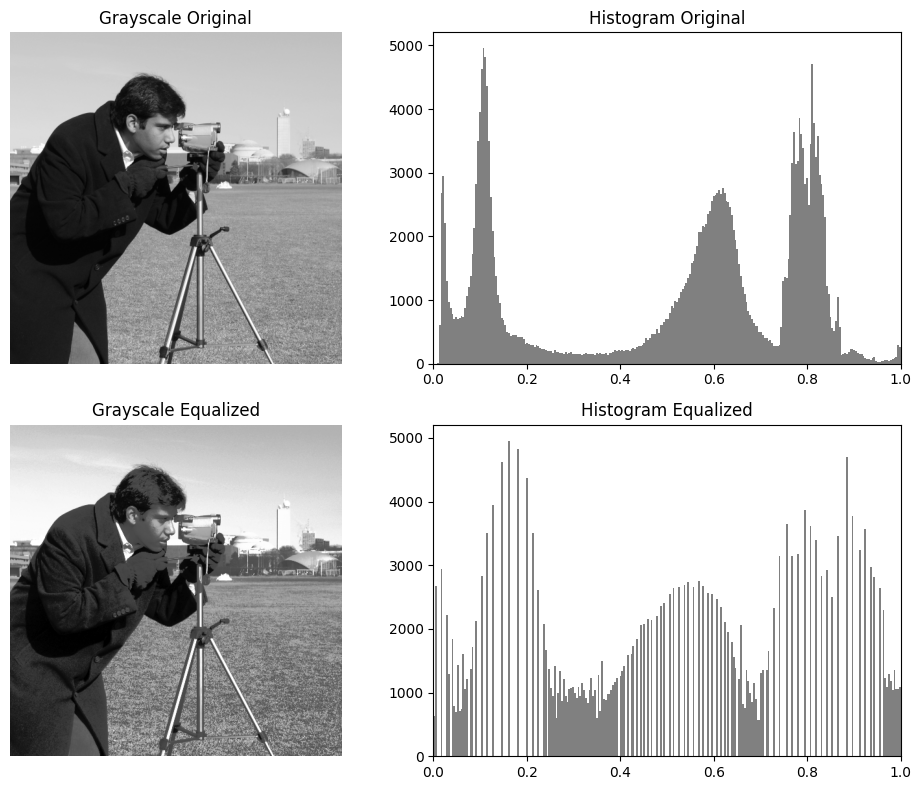

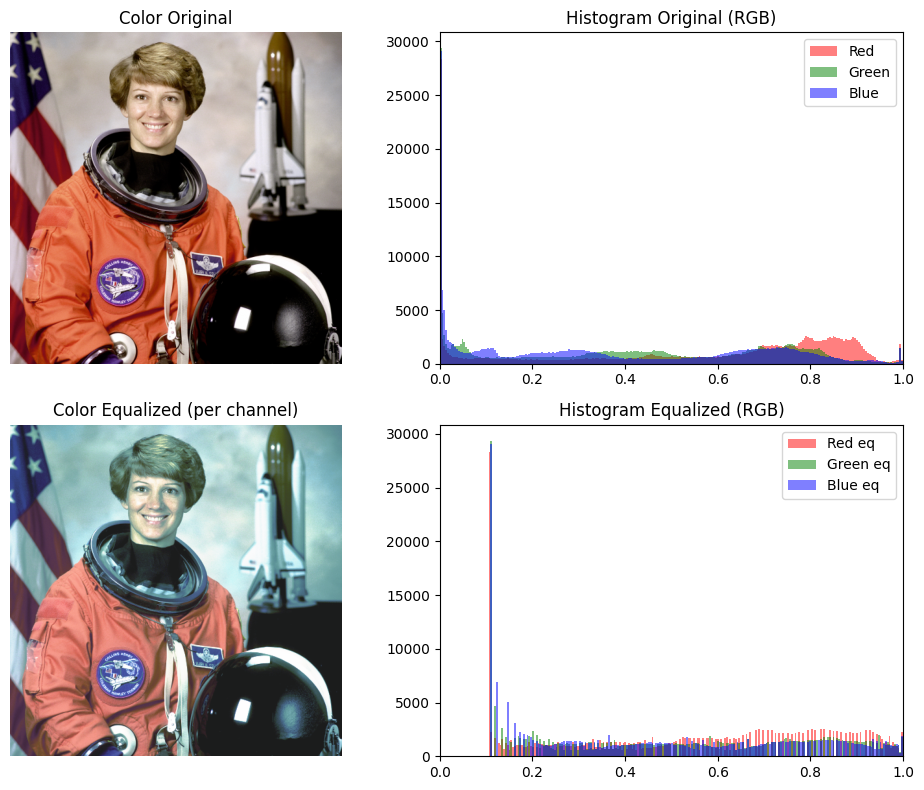

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# -----------------------------------------------------
# BAGIAN 1: HISTOGRAM & EKUALISASI HISTOGRAM (GRAYSCALE)
# -----------------------------------------------------

# 1. Memuat citra grayscale
image_gray_uint8 = data.camera()  # sudah grayscale (uint8, 0..255)
image_gray = img_as_float(image_gray_uint8)  # konversi ke float [0..1]

# 2. Menghitung histogram citra asli (dengan numpy.histogram)
# Kita perbesar bins=256 untuk melihat distribusi piksel
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi histogram
# Dengan skimage.exposure.equalize_hist, hasil di rentang [0..1]
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0,1))

# 4. Plot grayscale: citra asli & histogram, citra ekualisasi & histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli Grayscale
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

# (b) Histogram Citra Asli
axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0,1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0,1)

# (c) Citra Hasil Ekualisasi
axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

# (d) Histogram Citra Hasil Ekualisasi
axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0,1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0,1)

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# BAGIAN 2: HISTOGRAM & EKUALISASI HISTOGRAM (CITRA WARNA)
# -------------------------------------------------------

# 1. Memuat citra berwarna
image_color_uint8 = data.astronaut()  # citra berwarna RGB (uint8)
image_color = img_as_float(image_color_uint8)  # konversi ke float [0..1]

# 2. Kita dapat menghitung histogram gabungan (semua kanal) atau per kanal
# Di sini kita tampilkan histogram gabungan R, G, B untuk citra asli.
r_channel = image_color[:,:,0]
g_channel = image_color[:,:,1]
b_channel = image_color[:,:,2]

# Hitung histogram untuk tiap kanal, 256 bins
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=(0,1))
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=(0,1))
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi histogram tiap kanal secara independen
# (Catatan: cara ini bisa mengubah keseimbangan warna.
# Terkadang lebih baik melakukan ekualisasi hanya pada kanal luminance (Y)
# atau Value (HSV). Tapi di sini kita tunjukkan contoh per kanal.)
r_eq = exposure.equalize_hist(r_channel)
g_eq = exposure.equalize_hist(g_channel)
b_eq = exposure.equalize_hist(b_channel)

# Gabungkan kembali menjadi citra RGB yang sudah di-ekualisasi
image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# Hitung histogram citra berwarna ekualisasi (tiap kanal)
hist_r_eq, bins_r_eq = np.histogram(r_eq.ravel(), bins=256, range=(0,1))
hist_g_eq, bins_g_eq = np.histogram(g_eq.ravel(), bins=256, range=(0,1))
hist_b_eq, bins_b_eq = np.histogram(b_eq.ravel(), bins=256, range=(0,1))

# 4. Plot citra berwarna & histogram
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli (Color)
axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

# (b) Histogram Asli (tumpuk R, G, B)
axes2[0, 1].hist(r_channel.ravel(), bins=256, range=(0,1), color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g_channel.ravel(), bins=256, range=(0,1), color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b_channel.ravel(), bins=256, range=(0,1), color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].set_xlim(0,1)
axes2[0, 1].legend(loc='upper right')

# (c) Citra Hasil Ekualisasi (RGB)
axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

# (d) Histogram Ekualisasi (tumpuk R, G, B)
axes2[1, 1].hist(r_eq.ravel(), bins=256, range=(0,1), color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, range=(0,1), color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, range=(0,1), color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].set_xlim(0,1)
axes2[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


# Praktikum 3

# Praktikum 4